#  LOGISTIC REGRESSION 


1. Data Exploration:
a. Load the dataset and perform exploratory data analysis (EDA).
b. Examine the features, their types, and summary statistics.
c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.
2. Data Preprocessing:
a. Handle missing values (e.g., imputation).
b. Encode categorical variables.
3. Model Building:
a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
b. Train the model using the training data.
4. Model Evaluation:
a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
Visualize the ROC curve.
5. Interpretation:
a. Interpret the coefficients of the logistic regression model.
b. Discuss the significance of features in predicting the target variable (survival probability in this case).
6. Deployment with Streamlit:
In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions. 

(optional)For online deployment, use Streamlit Community Cloud, which supports deployment from GitHub repositories. 
Detailed deployment instructions are available in the Streamlit Documentation.
https://docs.streamlit.io/streamlit-community-cloud/deploy-your-app 
Interview Questions:
1. What is the difference between precision and recall?
2. What is cross-validation, and why is it important in binary classification?



### 1. Data Exploration (EDA - Exploratory Data Analysis)

##### 1: Load the dataset

In [5]:
import pandas as pd

df = pd.read_csv(r"C:/Users/DELL/Desktop/DATAsets/Titanic_train.csv")  
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### 1.2: Check Basic Info & Missing Values

In [7]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### 1.3: Summary Statistics

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
#Mean, median, standard deviation, min, max, etc.Identifies outliers and distributions.

#### 1.4: Visualizations

##### Histogram (Feature Distribution)

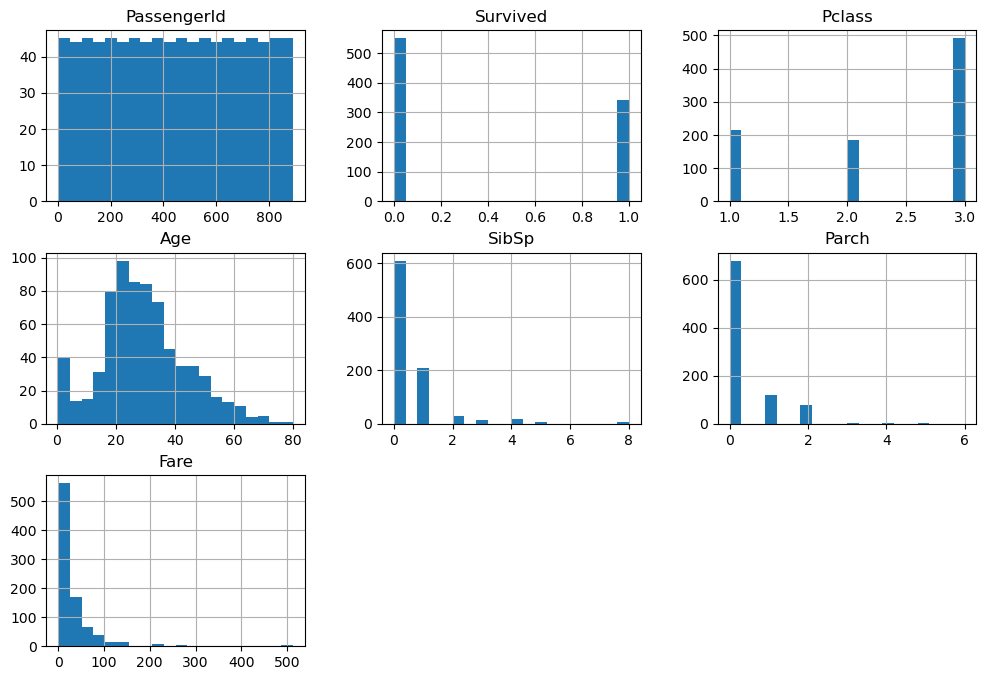

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for numerical features
df.hist(figsize=(12, 8), bins=20)           #This helps understand how the numerical features are distributed.
plt.show()


##### Box Plot (Check for Outliers)

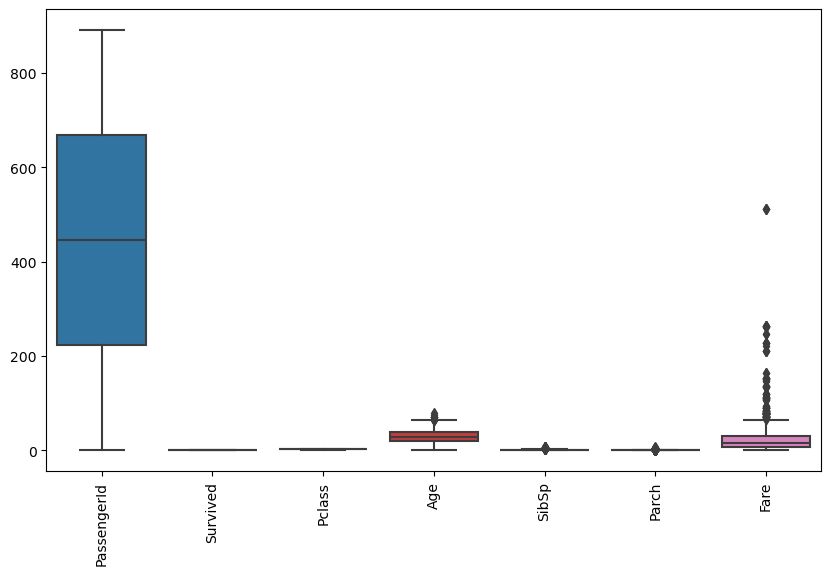

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


In [17]:
#Can detect ouliers in Age and Fare the most. Box plots help identify outliers (values that are too high or too low).

##### Correlation Heatmap

C:\Users\DELL\AppData\Local\Temp\ipykernel_8304\2745658795.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


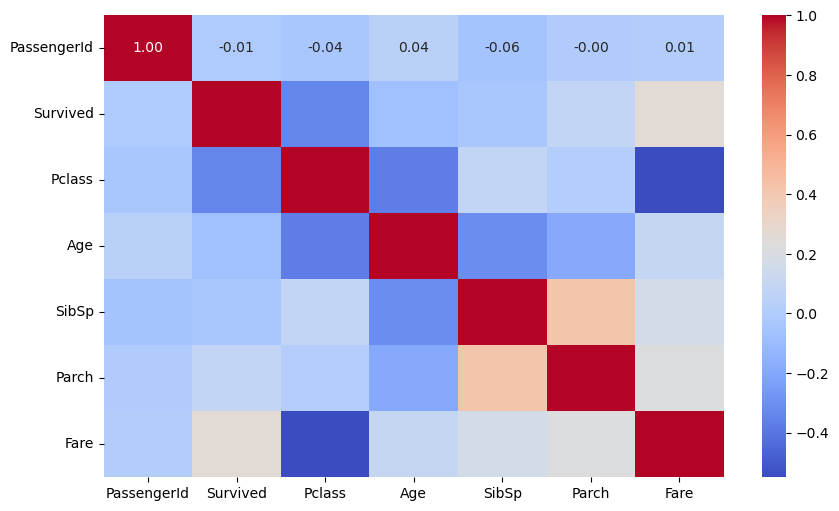

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [20]:
#This helps us identify which features are strongly related to the target variable and helps #This helps us find relationship between features.

### 2. Data Preprocessing

##### 2.1: Handle Missing Values


In [23]:
# For numerical columns: Fill missing values with the mean or median.

df["Age"].fillna(df["Age"].median(), inplace=True)

In [24]:
# For categorical features, fill with mode (most frequent value)
df.fillna(df.mode(numeric_only=True).iloc[0], inplace=True)


##### 2.2: Encode Categorical Variables

In [26]:
#Use One-Hot Encoding for categorical features
df = pd.get_dummies(df, drop_first=True)         #This converts categorical variables into numerical values.
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1


##### 2.3: Train-Test Split

In [28]:
from sklearn.model_selection import train_test_split

X = df.drop("Survived", axis=1)  # Features
y = df["Survived"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [31]:
X_train, X_test, y_train, y_test

(     PassengerId  Pclass   Age  SibSp  Parch      Fare  \
 331          332       1  45.5      0      0   28.5000   
 733          734       2  23.0      0      0   13.0000   
 382          383       3  32.0      0      0    7.9250   
 704          705       3  26.0      1      0    7.8542   
 813          814       3   6.0      4      2   31.2750   
 ..           ...     ...   ...    ...    ...       ...   
 106          107       3  21.0      0      0    7.6500   
 270          271       1  28.0      0      0   31.0000   
 860          861       3  41.0      2      0   14.1083   
 435          436       1  14.0      1      2  120.0000   
 102          103       1  21.0      0      1   77.2875   
 
      Name_Abbott, Mr. Rossmore Edward  Name_Abbott, Mrs. Stanton (Rosa Hunt)  \
 331                                 0                                      0   
 733                                 0                                      0   
 382                                 0         

### 3. Model Building

##### 3.1: Train the Logistic Regression Model

In [34]:
from sklearn.linear_model import LogisticRegression

# Initialize model
model = LogisticRegression()

# Train model
model.fit(X_train, y_train)


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### 4. Model Evaluation

##### 4.1: Predict on Test Data

In [37]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC Curve

In [38]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [39]:
y_prob

array([0.08763899, 0.17164539, 0.18747646, 0.80702263, 0.63698193,
       0.90678118, 0.64839957, 0.13202766, 0.64484359, 0.59384831,
       0.28342736, 0.14110515, 0.62154146, 0.08381387, 0.15570418,
       0.87884012, 0.36810099, 0.73369738, 0.26719451, 0.22344307,
       0.10755246, 0.2678038 , 0.66892151, 0.16368343, 0.1425795 ,
       0.07371841, 0.15748815, 0.21751462, 0.03408043, 0.6927253 ,
       0.19506407, 0.64313186, 0.33430784, 0.65677806, 0.10229749,
       0.13848633, 0.20730193, 0.62158246, 0.89878657, 0.16237667,
       0.22893325, 0.12765068, 0.17832999, 0.15480458, 0.46691071,
       0.01888905, 0.08837917, 0.11608814, 0.09789175, 0.20792485,
       0.65813926, 0.91286517, 0.01020272, 0.41411782, 0.07242585,
       0.81601447, 0.11918984, 0.95491114, 0.75433276, 0.59618857,
       0.12284186, 0.72654434, 0.81865537, 0.21669457, 0.08537762,
       0.80800152, 0.20834141, 0.1183662 , 0.07223185, 0.91781983,
       0.68466193, 0.95947433, 0.36056866, 0.89584899, 0.18280

##### 4.2: Performance Metrics

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")


Accuracy: 0.7933
Precision: 0.7846
Recall: 0.6892
F1 Score: 0.7338
ROC-AUC Score: 0.8310


##### 4.3: Visualizing the ROC Curve

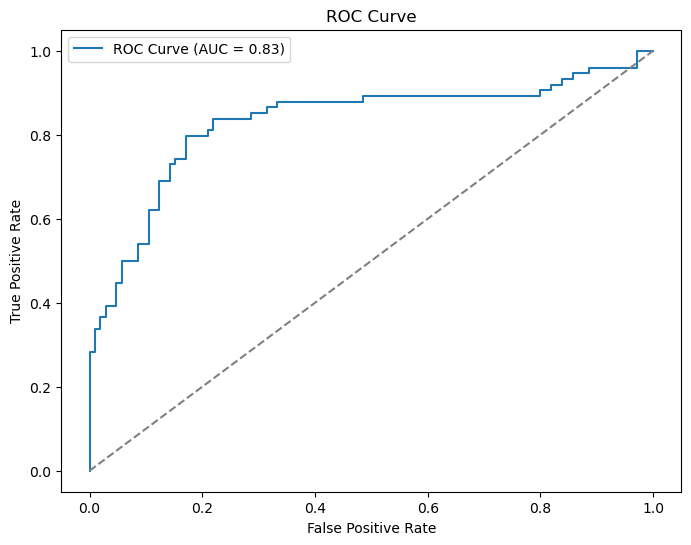

In [43]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


### 5. Model Interpretation

#####  5.1: Understanding Coefficients

In [46]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coefficients.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
976,Ticket_1601,0.305960
1133,Ticket_29106,0.289920
1240,Ticket_347742,0.260320
1458,Ticket_C.A. 37671,0.238562
1647,Cabin_C52,0.212889
...,...,...
1233,Ticket_347088,-0.204916
1229,Ticket_347082,-0.295241
1,Pclass,-0.399807
4,Parch,-0.617431


In [47]:
#Positive coefficients mean the feature increases the probability of the event occurring.
#Negative coefficients mean it decreases the probability.

### 6. Deployment with Streamlit

#####  6.1: Install Streamlit

In [50]:
!pip install streamlit

Defaulting to user installation because normal site-packages is not writeable


##### 6.2: Create a Streamlit App (app.py)

In [52]:
import streamlit as st
import pickle
import numpy as np

# Load trained model
with open("logistic_model.pkl", "rb") as file:
    model = pickle.load(file)

st.title("Survival Probability Predictor")

2025-02-28 18:39:02.224 
  command:

    streamlit run C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [53]:
# User input fields
age = st.number_input("Enter Age", min_value=0, max_value=100, value=30)
fare = st.number_input("Enter Fare", min_value=0.0, value=50.0)
pclass = st.selectbox("Ticket Class", [1, 2, 3])
sex = st.selectbox("Gender", ["Male", "Female"])
embarked = st.selectbox("Embarked Port", ["C", "Q", "S"])

In [54]:
sex, embarked, pclass, fare, age

('Male', 'C', 1, 50.0, 30)

In [55]:
# Encoding inputs
sex = 1 if sex == "Male" else 0
embarked_C = 1 if embarked == "C" else 0
embarked_Q = 1 if embarked == "Q" else 0
embarked_S = 1 if embarked == "S" else 0


In [56]:
sex, embarked_C, embarked_Q, embarked_S

(1, 1, 0, 0)

In [57]:
# Predict button
if st.button("Predict Survival"):
    features = np.array([[age, fare, pclass, sex, embarked_C, embarked_Q, embarked_S]])
    prediction = model.predict(features)

    if prediction == 1:
        st.success("Survived!")
    else:
        st.error("Did not survive.")

##### 6.3: Save Model

In [59]:
import pickle

with open("logistic_model.pkl", "wb") as file:
    pickle.dump(model, file)

##### 6.4: Run Streamlit Locally

In [61]:
import pickle

# Use a raw string (r"") or double backslashes (\\) in Windows paths
model_path = r"C:/Users/DELL/ExcelR - Data Science Assignments/logistic_model.pkl"

# Load the trained model
with open(model_path, 'rb') as file:
    model = pickle.load(file)

print("Model loaded successfully!")


Model loaded successfully!


In [72]:
cd "C:/Users/DELL/ExcelR - Data Science Assignments"
streamlit run app.py
#this is done in anaconda prompt

SyntaxError: invalid syntax (31185173.py, line 1)

In [ ]:
import streamlit as st

st.title("Logistic Regression Model Deployment")
st.write("Welcome to the Logistic Regression Prediction App!")

# Example Input Fields
input_value = st.number_input("Enter a value:")
st.write(f"You entered: {input_value}")


In [63]:
python -m streamlit run app.py
# this is done in anaconda prompt

SyntaxError: invalid syntax (3791523335.py, line 1)

### Interview Questions & Answers

##### 1. What is the difference between Precision and Recall?

In [67]:
#Precision = TP / (TP + FP) → Focuses on how many positive predictions were correct.
#Recall = TP / (TP + FN) → Focuses on how many actual positives were correctly predicted.
###Use Precision when false positives are costly (e.g., spam detection). Use Recall when false negatives are costly (e.g., cancer detection).

##### 2. What is Cross-Validation, and why is it important?


In [70]:
#Cross-validation splits data into multiple training/testing sets.
#k-Fold Cross Validation: Data is split into k subsets, and the model is trained k times.
### Helps to:
          # Avoid overfitting.
          # Improve generalization.
          # Ensure robust performance.